In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
df=pd.read_csv('/content/telecom_churn.csv')
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [10]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [14]:
df.RoamMins.unique()

array([10. , 13.7, 12.2,  6.6, 10.1,  6.3,  7.5,  7.1,  8.7, 11.2, 12.7,
        9.1, 12.3, 13.1,  5.4, 13.8,  8.1, 13. , 10.6,  5.7,  9.5,  7.7,
       10.3, 15.5, 14.7, 11.1, 14.2, 12.6, 11.8,  8.3, 14.5, 10.5,  9.4,
       14.6,  9.2,  3.5,  8.5, 13.2,  7.4,  8.8, 11. ,  7.8,  6.8, 11.4,
        9.3,  9.7, 10.2,  8. ,  5.8, 12.1, 12. , 11.6,  8.2,  6.2,  7.3,
        6.1, 11.7, 15. ,  9.8, 12.4,  8.6, 10.9, 13.9,  8.9,  7.9,  5.3,
        4.4, 12.5, 11.3,  9. ,  9.6, 13.3, 20. ,  7.2,  6.4, 14.1, 14.3,
        6.9, 11.5, 15.8, 12.8, 16.2,  0. , 11.9,  9.9,  8.4, 10.8, 13.4,
       10.7, 17.6,  4.7,  2.7, 13.5, 12.9, 14.4, 10.4,  6.7, 15.4,  4.5,
        6.5, 15.6,  5.9, 18.9,  7.6,  5. ,  7. , 14. , 18. , 16. , 14.8,
        3.7,  2. ,  4.8, 15.3,  6. , 13.6, 17.2, 17.5,  5.6, 18.2,  3.6,
       16.5,  4.6,  5.1,  4.1, 16.3, 14.9, 16.4, 16.7,  1.3, 15.2, 15.1,
       15.9,  5.5, 16.1,  4. , 16.9,  5.2,  4.2, 15.7, 17. ,  3.9,  3.8,
        2.2, 17.1,  4.9, 17.9, 17.3, 18.4, 17.8,  4

<Axes: xlabel='CustServCalls', ylabel='count'>

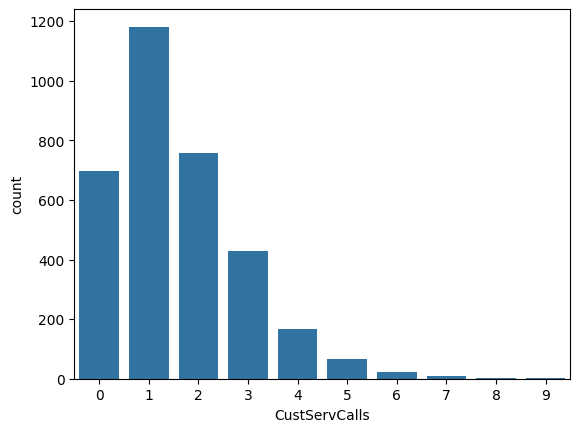

In [17]:
sns.countplot(x=df['CustServCalls'])

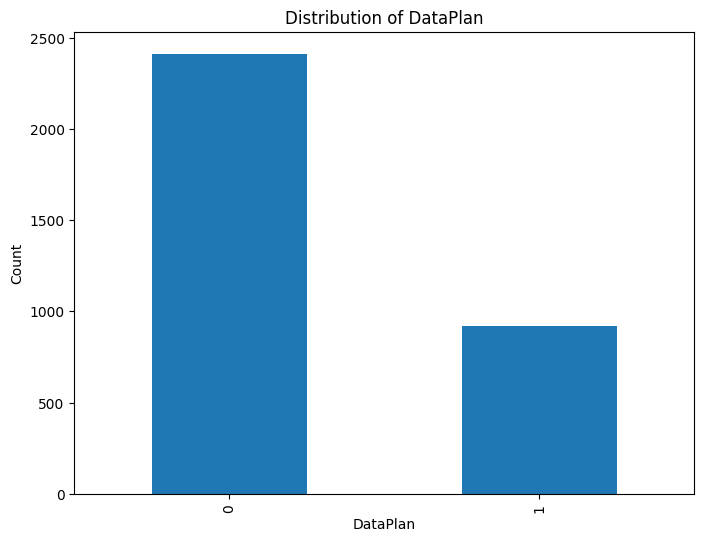

In [20]:
plt.figure(figsize=(8, 6))
df['DataPlan'].value_counts().plot(kind='bar')
plt.title('Distribution of DataPlan')
plt.xlabel('DataPlan')
plt.ylabel('Count')
plt.show()

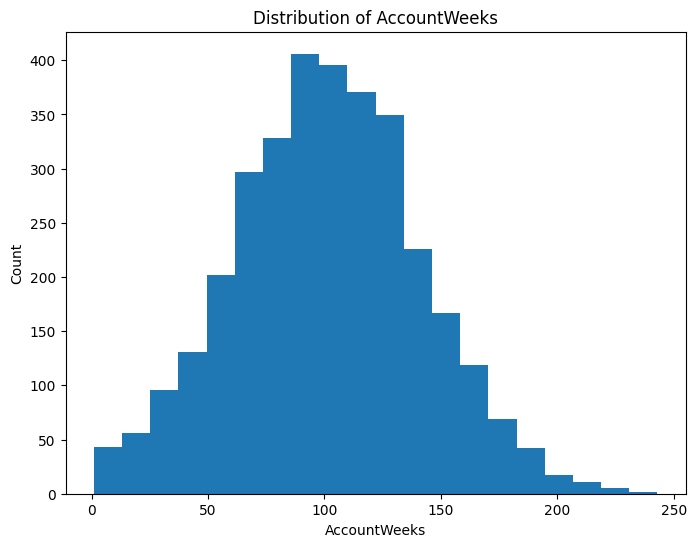

In [31]:
plt.figure(figsize=(8, 6))
df['AccountWeeks'].plot(kind='hist', bins=20)
plt.title('Distribution of AccountWeeks')
plt.xlabel('AccountWeeks')
plt.ylabel('Count')
plt.show()

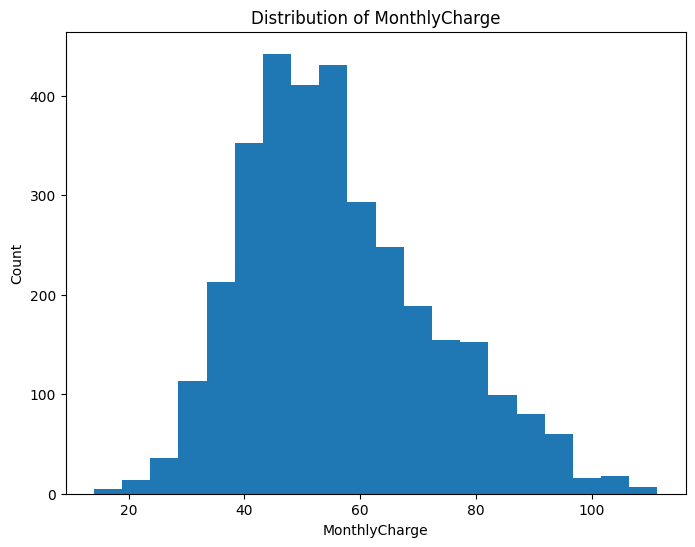

In [32]:
plt.figure(figsize=(8, 6))
df['MonthlyCharge'].plot(kind='hist', bins=20)
plt.title('Distribution of MonthlyCharge')
plt.xlabel('MonthlyCharge')
plt.ylabel('Count')
plt.show()

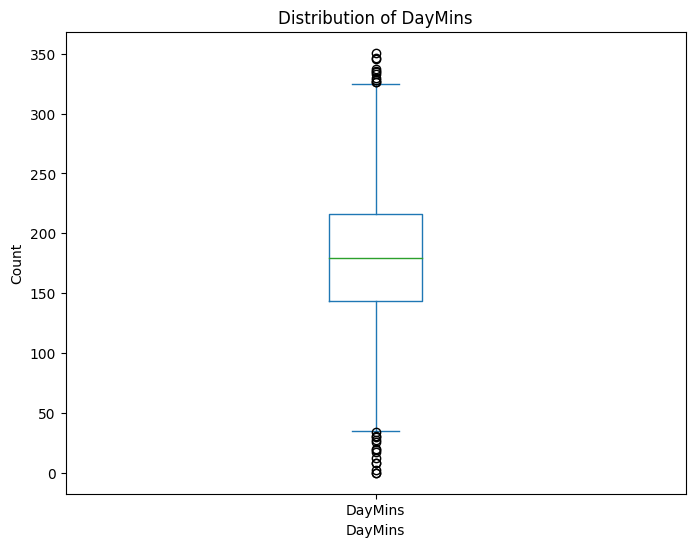

In [36]:
plt.figure(figsize=(8, 6))
df['DayMins'].plot(kind='box')
plt.title('Distribution of DayMins')
plt.xlabel('DayMins')
plt.ylabel('Count')
plt.show()

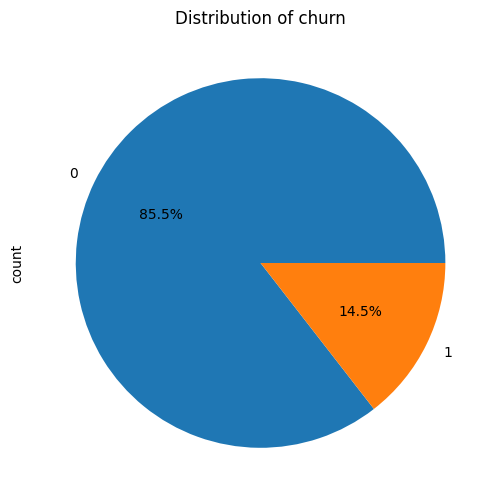

In [39]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of churn')
plt.show()

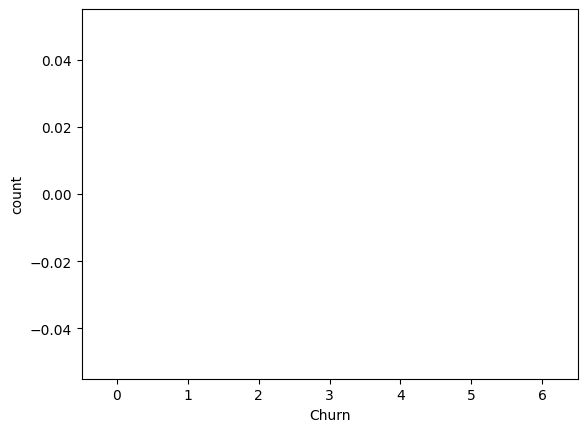

In [42]:
df['Churn'] = df.Churn.map({False:0, True:1})
sns.countplot(x=df.Churn);

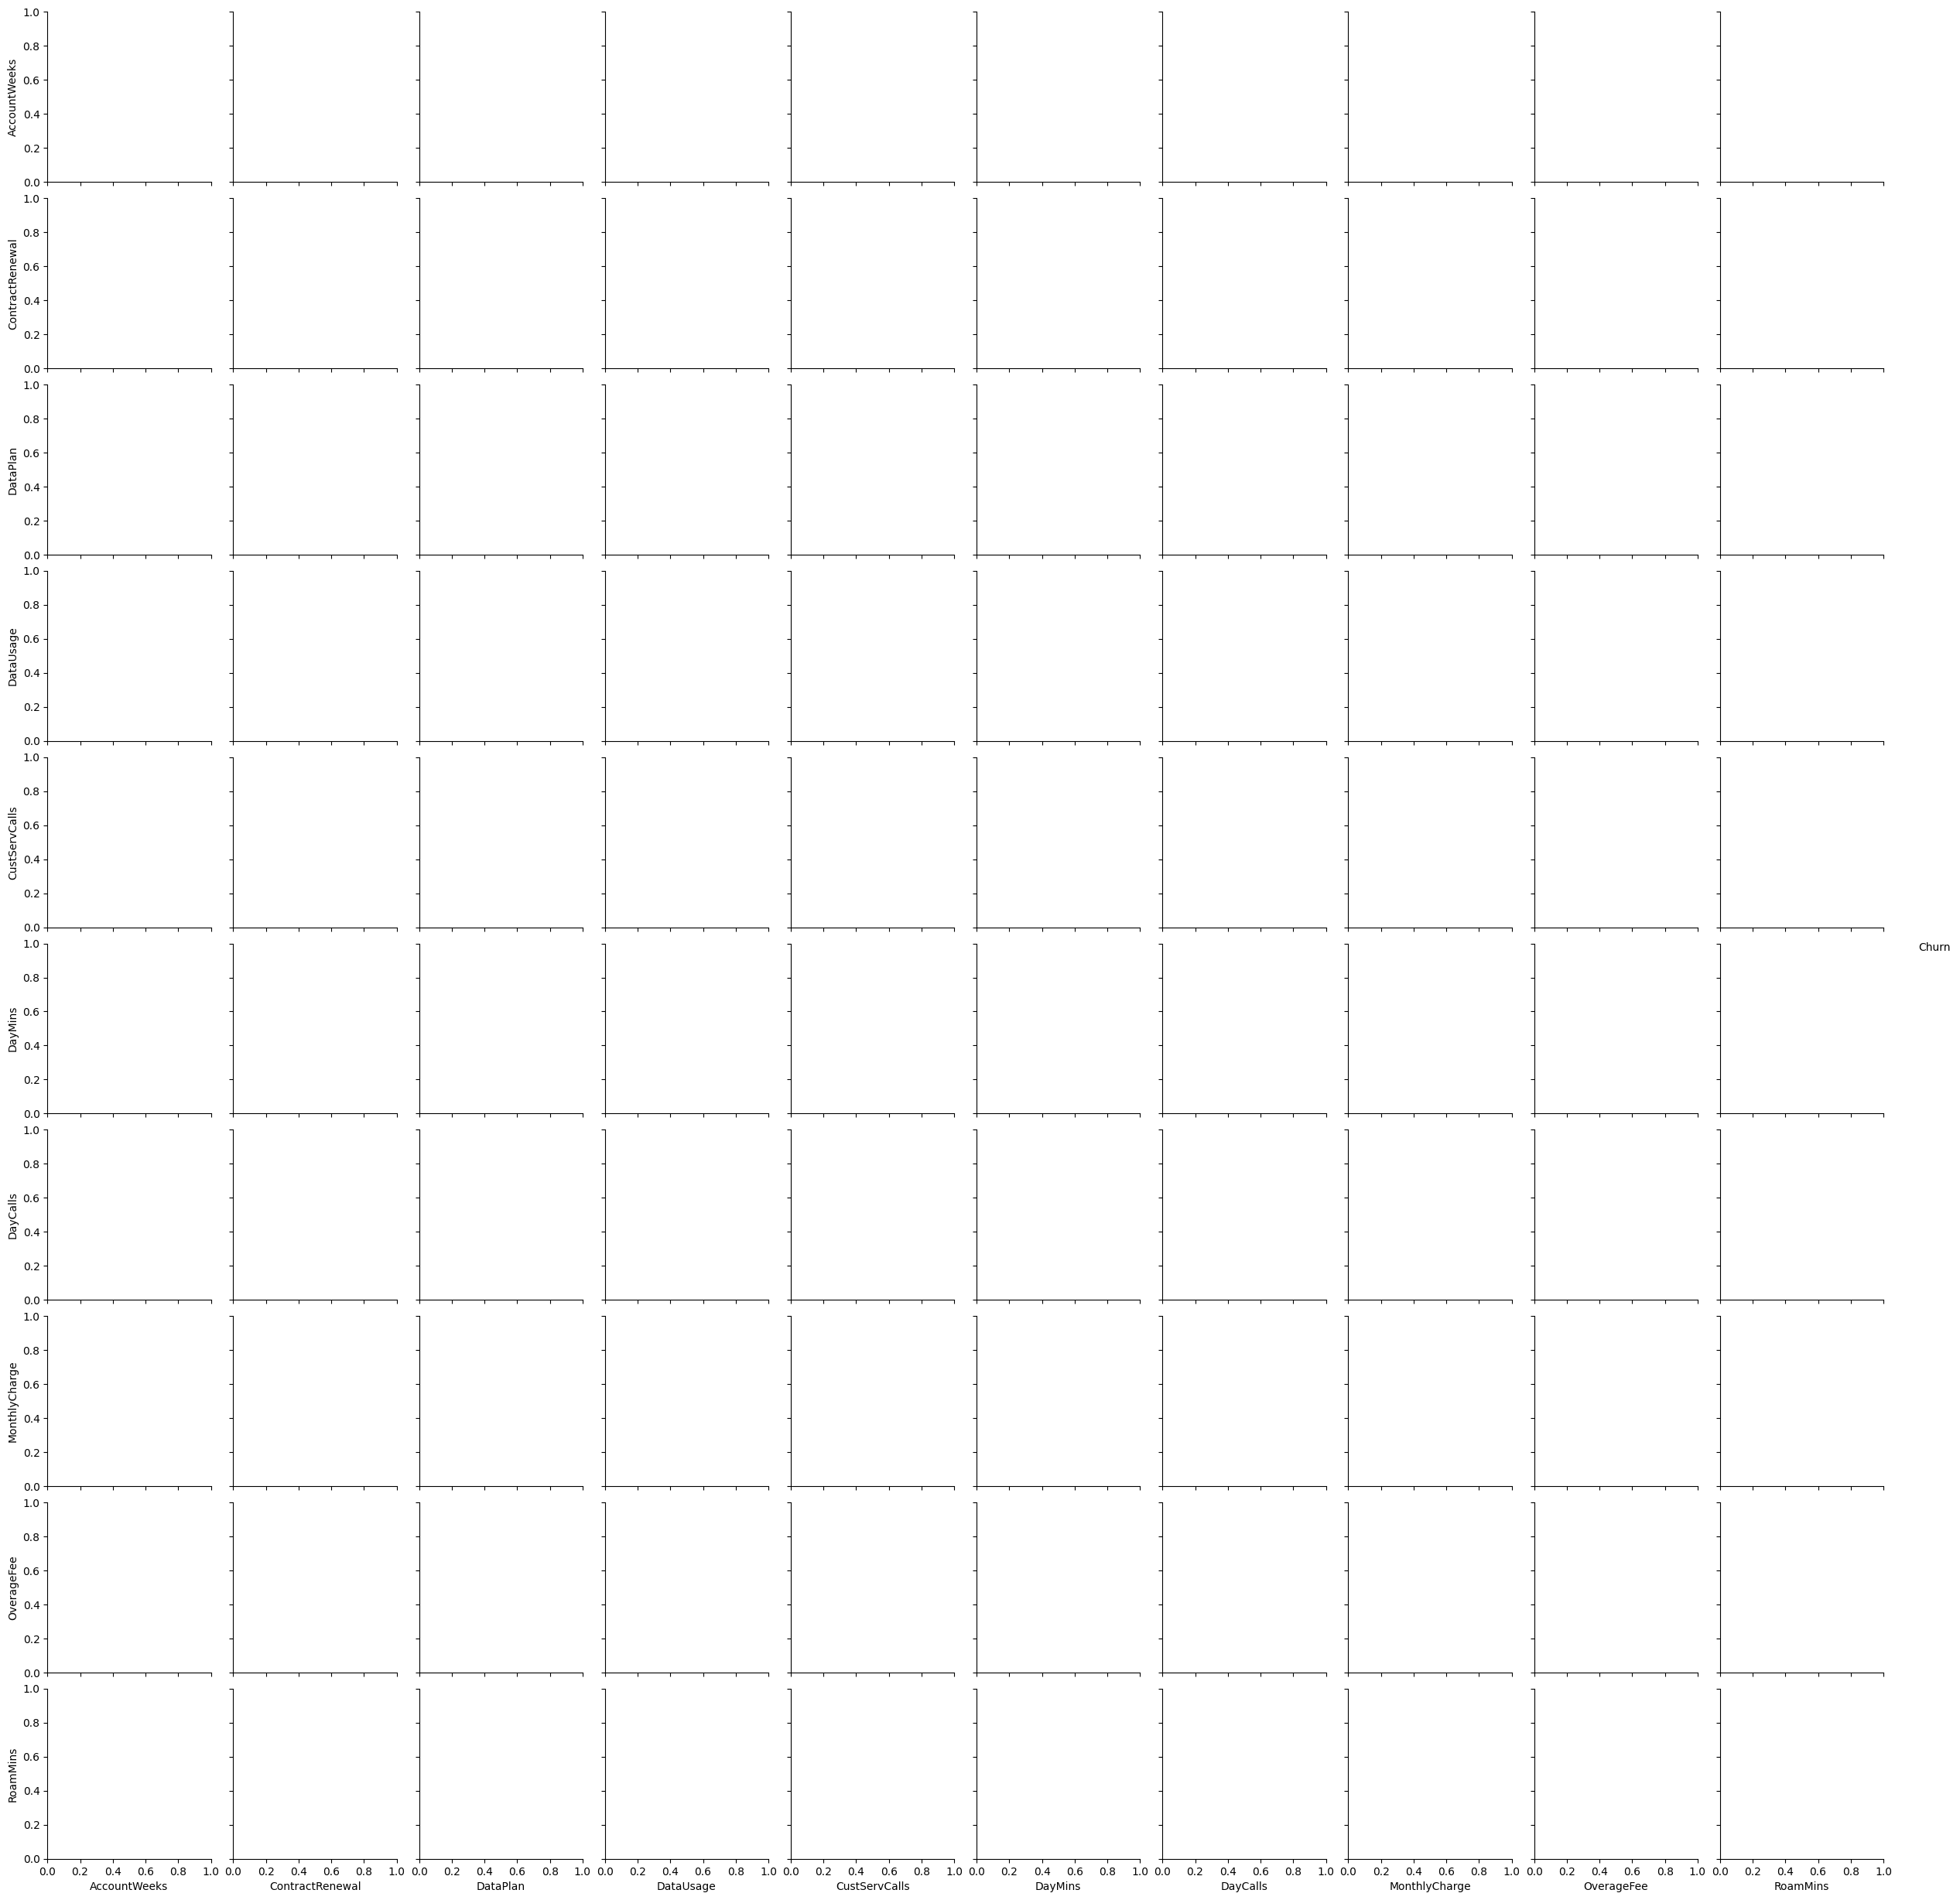

In [46]:
sns.pairplot(df,hue="Churn");

In [51]:
le = LabelEncoder()
df['CustServCalls'] =le.fit_transform(df['CustServCalls'])
df['DataPlan'] =le.fit_transform(df['DataPlan'])
df['AccountWeeks'] =le.fit_transform(df['AccountWeeks'])

arr=['CustServCalls', 'DataPlan','DataPlan']
for col in arr:
 df[col] = le.fit_transform(df[col])

In [52]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,126,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,105,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,135,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,82,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,73,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,189,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,66,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,26,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,182,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [53]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = log_reg.predict(x_test)

In [61]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [63]:
print( 'Accuracy:', accuracy)
print( 'Precision:', precision)
print( 'Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8545727136431784
Precision: 0.5555555555555556
Recall: 0.19801980198019803
F1 Score: 0.291970802919708


In [66]:
result = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'Fl Score'],
'Value': [accuracy, precision, recall, f1]})

In [67]:
print(result)

      Metric     Value
0   Accuracy  0.854573
1  Precision  0.555556
2     Recall  0.198020
3   Fl Score  0.291971


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[550  16]
 [ 81  20]]


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.56      0.20      0.29       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.61       667
weighted avg       0.82      0.85      0.82       667

